<a href="https://colab.research.google.com/github/rushik-desai-code/anomalous-request-detection/blob/main/capstone_lstm_ae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving KDDTrain+.txt to KDDTrain+ (1).txt


In [ ]:
uploaded2=files.upload()

Saving KDDTest+.txt to KDDTest+ (1).txt


In [ ]:
import io
df=pandas.read_csv(io.BytesIO(uploaded['KDDTrain+.txt']))
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in'
,'num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login'
,'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate'
,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate'
,'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
df.columns = columns
df.head()

In [ ]:
df_test=pandas.read_csv(io.BytesIO(uploaded2['KDDTest+.txt']))
df_test.columns = columns
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
mapping_dict = {'tcp':0,
 'udp':1,
 'icmp':2
 }

mapping_dict1 = {'SF':0,
 'S0':1,
 'REJ':2,
 'RSTR':3,
 'SH':4,
 'RSTO':5,
 'S1':6,
 'RSTOS0':7,
 'S3':8,
 'S2':9,
 'OTH':10
 }
a=df['service'].unique().tolist()
mapping_dict2={}
for i in range(len(a)):
 mapping_dict2[a[i]]=i
print(mapping_dict2)


{'other': 0, 'private': 1, 'http': 2, 'remote_job': 3, 'ftp_data': 4, 'name': 5, 'netbios_ns': 6, 'eco_i': 7, 'mtp': 8, 'telnet': 9, 'finger': 10, 'domain_u': 11, 'supdup': 12, 'uucp_path': 13, 'Z39_50': 14, 'smtp': 15, 'csnet_ns': 16, 'uucp': 17, 'netbios_dgm': 18, 'urp_i': 19, 'auth': 20, 'domain': 21, 'ftp': 22, 'bgp': 23, 'ldap': 24, 'ecr_i': 25, 'gopher': 26, 'vmnet': 27, 'systat': 28, 'http_443': 29, 'efs': 30, 'whois': 31, 'imap4': 32, 'iso_tsap': 33, 'echo': 34, 'klogin': 35, 'link': 36, 'sunrpc': 37, 'login': 38, 'kshell': 39, 'sql_net': 40, 'time': 41, 'hostnames': 42, 'exec': 43, 'ntp_u': 44, 'discard': 45, 'nntp': 46, 'courier': 47, 'ctf': 48, 'ssh': 49, 'daytime': 50, 'shell': 51, 'netstat': 52, 'pop_3': 53, 'nnsp': 54, 'IRC': 55, 'pop_2': 56, 'printer': 57, 'tim_i': 58, 'pm_dump': 59, 'red_i': 60, 'netbios_ssn': 61, 'rje': 62, 'X11': 63, 'urh_i': 64, 'http_8001': 65, 'aol': 66, 'http_2784': 67, 'tftp_u': 68, 'harvest': 69}


In [ ]:
data=df[df['attack']=='normal']
data_an=df[df['attack']!='normal']
data['protocol_type'] = data['protocol_type'].map(mapping_dict)
data['flag'] = data['flag'].map(mapping_dict1)
data['service'] = data['service'].map(mapping_dict2)

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.0,0.6,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
2,0,0,2,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,0,2,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
11,0,0,2,0,287,2251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,7,0.0,0.00,0.0,0.0,1.00,0.00,0.43,8,219,1.0,0.0,0.12,0.03,0.00,0.00,0.0,0.00,normal,21
15,0,0,2,0,300,13788,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,9,0.0,0.11,0.0,0.0,1.00,0.00,0.22,91,255,1.0,0.0,0.01,0.02,0.00,0.00,0.0,0.00,normal,21


In [ ]:
mapping_dict_an = {'tcp':0,
 'udp':1,
 'icmp':2
 }

mapping_dict1_an = {'SF':0,
 'S0':1,
 'REJ':2,
 'RSTR':3,
 'SH':4,
 'RSTO':5,
 'S1':6,
 'RSTOS0':7,
 'S3':8,
 'S2':9,
 'OTH':10
 }
a=df['service'].unique().tolist()
mapping_dict2_an={}
for i in range(len(a)):
 mapping_dict2_an[a[i]]=i
print(mapping_dict2_an)


{'other': 0, 'private': 1, 'http': 2, 'remote_job': 3, 'ftp_data': 4, 'name': 5, 'netbios_ns': 6, 'eco_i': 7, 'mtp': 8, 'telnet': 9, 'finger': 10, 'domain_u': 11, 'supdup': 12, 'uucp_path': 13, 'Z39_50': 14, 'smtp': 15, 'csnet_ns': 16, 'uucp': 17, 'netbios_dgm': 18, 'urp_i': 19, 'auth': 20, 'domain': 21, 'ftp': 22, 'bgp': 23, 'ldap': 24, 'ecr_i': 25, 'gopher': 26, 'vmnet': 27, 'systat': 28, 'http_443': 29, 'efs': 30, 'whois': 31, 'imap4': 32, 'iso_tsap': 33, 'echo': 34, 'klogin': 35, 'link': 36, 'sunrpc': 37, 'login': 38, 'kshell': 39, 'sql_net': 40, 'time': 41, 'hostnames': 42, 'exec': 43, 'ntp_u': 44, 'discard': 45, 'nntp': 46, 'courier': 47, 'ctf': 48, 'ssh': 49, 'daytime': 50, 'shell': 51, 'netstat': 52, 'pop_3': 53, 'nnsp': 54, 'IRC': 55, 'pop_2': 56, 'printer': 57, 'tim_i': 58, 'pm_dump': 59, 'red_i': 60, 'netbios_ssn': 61, 'rje': 62, 'X11': 63, 'urh_i': 64, 'http_8001': 65, 'aol': 66, 'http_2784': 67, 'tftp_u': 68, 'harvest': 69}


In [ ]:
data_an['protocol_type'] = data_an['protocol_type'].map(mapping_dict_an)
data_an['flag'] = data_an['flag'].map(mapping_dict1_an)
data_an['service'] = data_an['service'].map(mapping_dict2_an)

data_an.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,19
4,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.0,255,19,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune,21
5,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.0,255,9,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.0,255,15,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
7,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.0,255,23,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21


In [ ]:
mapping_dict_test = {'tcp':0,
 'udp':1,
 'icmp':2
 }

mapping_dict1_test = {'SF':0,
 'S0':1,
 'REJ':2,
 'RSTR':3,
 'SH':4,
 'RSTO':5,
 'S1':6,
 'RSTOS0':7,
 'S3':8,
 'S2':9,
 'OTH':10
 }
a=df['service'].unique().tolist()
mapping_dict2_test={}
for i in range(len(a)):
 mapping_dict2_test[a[i]]=i
print(mapping_dict2_test)

{'other': 0, 'private': 1, 'http': 2, 'remote_job': 3, 'ftp_data': 4, 'name': 5, 'netbios_ns': 6, 'eco_i': 7, 'mtp': 8, 'telnet': 9, 'finger': 10, 'domain_u': 11, 'supdup': 12, 'uucp_path': 13, 'Z39_50': 14, 'smtp': 15, 'csnet_ns': 16, 'uucp': 17, 'netbios_dgm': 18, 'urp_i': 19, 'auth': 20, 'domain': 21, 'ftp': 22, 'bgp': 23, 'ldap': 24, 'ecr_i': 25, 'gopher': 26, 'vmnet': 27, 'systat': 28, 'http_443': 29, 'efs': 30, 'whois': 31, 'imap4': 32, 'iso_tsap': 33, 'echo': 34, 'klogin': 35, 'link': 36, 'sunrpc': 37, 'login': 38, 'kshell': 39, 'sql_net': 40, 'time': 41, 'hostnames': 42, 'exec': 43, 'ntp_u': 44, 'discard': 45, 'nntp': 46, 'courier': 47, 'ctf': 48, 'ssh': 49, 'daytime': 50, 'shell': 51, 'netstat': 52, 'pop_3': 53, 'nnsp': 54, 'IRC': 55, 'pop_2': 56, 'printer': 57, 'tim_i': 58, 'pm_dump': 59, 'red_i': 60, 'netbios_ssn': 61, 'rje': 62, 'X11': 63, 'urh_i': 64, 'http_8001': 65, 'aol': 66, 'http_2784': 67, 'tftp_u': 68, 'harvest': 69}


In [ ]:
df_test['protocol_type'] = df_test['protocol_type'].map(mapping_dict_test)
df_test['flag'] = df_test['flag'].map(mapping_dict1_test)
df_test['service'] = df_test['service'].map(mapping_dict2_test)
is_attack_test = df_test.attack.map(lambda a: 0 if a == 'normal' else 1)
is_attack_test.shape
df_test.drop(labels=['attack'],axis=1,inplace=True)
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21
1,2,0,4,0,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21
2,0,2,7,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15
3,1,0,9,5,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
4,0,0,2,0,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,21


In [ ]:
data.drop(labels=['attack'],axis=1,inplace=True)
data_an.drop(labels=['attack'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_normalized = scaler.fit_transform(data)

In [ ]:
X_an=scaler.transform(data_an)
X_an=X_an.reshape(X_an.shape[0],1,X_an.shape[1])
X_an.shape

(58630, 1, 42)

In [ ]:
X_test=scaler.transform(df_test)
X_test=X_test.reshape(X_test.shape[0],1,X_test.shape[1])
X_test.shape

(22543, 1, 42)

In [ ]:
X_normalized.shape

(67342, 42)

In [ ]:
X_normalized=X_normalized.reshape(X_normalized.shape[0],1,X_normalized.shape[1])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64,
    input_shape=(X_normalized.shape[1], X_normalized.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_normalized.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_normalized.shape[2])))
model.compile(loss='mae', optimizer='adam')

In [ ]:
import timeit

In [ ]:
%time history = model.fit(X_normalized, X_normalized,epochs=10,batch_size=10,validation_split=0.05,shuffle=False)

Epoch 1/10
6398/6398 [==============================] - 30s 4ms/step - loss: 0.0266 - val_loss: 0.0127
Epoch 2/10
6398/6398 [==============================] - 25s 4ms/step - loss: 0.0162 - val_loss: 0.0105
Epoch 3/10
6398/6398 [==============================] - 26s 4ms/step - loss: 0.0146 - val_loss: 0.0093
Epoch 4/10
6398/6398 [==============================] - 26s 4ms/step - loss: 0.0138 - val_loss: 0.0091
Epoch 5/10
6398/6398 [==============================] - 26s 4ms/step - loss: 0.0133 - val_loss: 0.0085
Epoch 6/10
6398/6398 [==============================] - 26s 4ms/step - loss: 0.0129 - val_loss: 0.0084
Epoch 7/10
6398/6398 [==============================] - 26s 4ms/step - loss: 0.0127 - val_loss: 0.0084
Epoch 8/10
6398/6398 [==============================] - 25s 4ms/step - loss: 0.0125 - val_loss: 0.0081
Epoch 9/10
6398/6398 [==============================] - 26s 4ms/step - loss: 0.0122 - val_loss: 0.0079
Epoch 10/10
6398/6398 [==============================] - 26s 4ms/step - l

In [ ]:
model.evaluate(X_an,X_an)

1833/1833 [==============================] - 3s 1ms/step - loss: 0.0963


0.09628316760063171

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.2)

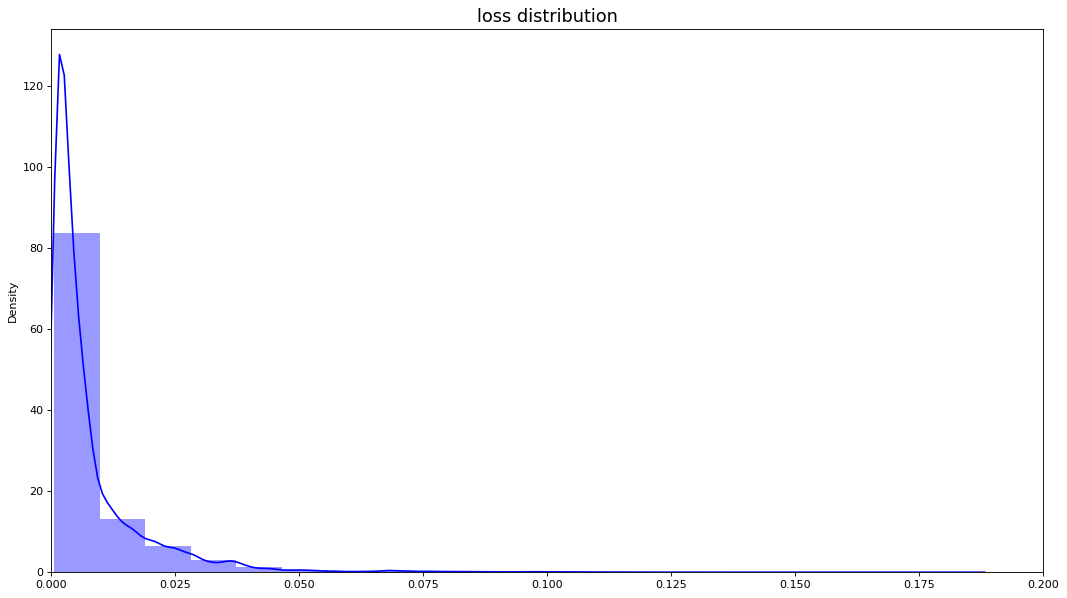

In [ ]:
y_train_=model.predict(X_normalized).reshape(X_normalized.shape[0],X_normalized.shape[2])
X_train_=X_normalized.reshape(X_normalized.shape[0],X_normalized.shape[2])
vec=numpy.sum(numpy.abs(y_train_-X_train_),axis=1)/42
import seaborn as sns
plt.figure(figsize=(16,9),dpi=80)
plt.title('loss distribution',fontsize=16)
sns.distplot(vec,bins=20,kde=True,color='blue')
plt.xlim([0.0,0.2])

In [ ]:
min(vec),max(vec)

(0.0005367646781238069, 0.18448750579173798)

In [ ]:
y=model.predict(X_an.reshape(X_an.shape[0],1,42))
y_e=numpy.sum(abs(y-X_an.reshape(X_an.shape[0],1,42)),axis=2)/42
y_e.shape

(58630, 1)

In [ ]:
min(y_e),max(y_e)

(array([0.0086203]), array([4.72599806]))

In [ ]:
y_test=model.predict(X_test.reshape(X_test.shape[0],1,42))


In [ ]:
y_test.shape

(22543, 1, 42)

In [ ]:
y_test_e=numpy.sum(abs(y_test-X_test.reshape(X_test.shape[0],1,42)),axis=2)/42

In [ ]:
threshold=0.015
round_t=numpy.vectorize(lambda a,threshold: 1 if a>threshold else 0)
y_test_detected=round_t(y_test_e,threshold)

In [ ]:
is_attack_test=list(is_attack_test)
y_test_detected=list(y_test_detected)

In [ ]:
len(is_attack_test),len(y_test_detected)

(22543, 22543)

In [ ]:
sum([1 for i in range(len(is_attack_test)) if y_test_detected[i]==is_attack_test[i]])/22543

0.9300004435966819

In [ ]:
thresholdlist=list(numpy.linspace(0,0.05,100))
acclist=[]

y_test_t=round_t(y_test_e,thresholdlist[1])
y_test_t=list(y_test_t)
y_test_t[0].shape

(1,)

In [ ]:
for t in thresholdlist:
  y_test_d=round_t(y_test_e,t)
  y_test_d=list(y_test_d)
  acc=sum([1 for i in range(len(is_attack_test)) if y_test_d[i]==is_attack_test[i]])/22543
  acclist.append(acc)



In [ ]:
acclist

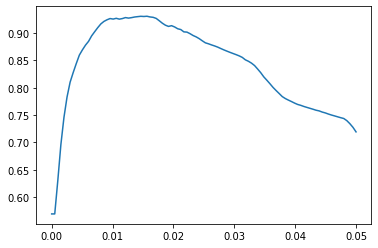

In [ ]:
plt.plot(thresholdlist,acclist)